In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
notebook_path = os.getcwd()
weights_file_path=f"{notebook_path}/c01_2_polynomial_single_feature_training_and_testing_weights.npy"

In [3]:
# Datasets path
# auto
csv_train_path = f"{notebook_path}/data/auto-train-preprocessed.csv"
csv_test_path = f"{notebook_path}/data/auto-test-preprocessed.csv"

In [4]:
def polynomial(x,degree_of_polynomial):
    phi_x = np.array([x**i for i in range(degree_of_polynomial+1)])
    phi_x = phi_x[..., 0].T
    return phi_x

In [5]:
def linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [6]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [7]:
def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0]
    print(f"grads.shape: {grads.shape}")
    return grads

In [8]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [9]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [10]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

In [11]:
def load_csv_as_augmented(csv_path,degree_of_polynomial):
    assert os.path.exists(csv_path), "File not exists, "+ csv_path
    df=pd.read_csv(csv_path)
    print(f"Loaded Data:")
    print(df)
    print(df.columns)
    # d=np.array(df)[:,1:]
    d=np.array(df)[:,:]
    x=d[:,:-1]
    # x_aug=np.hstack((np.ones((x.shape[0],1)),x))
    x_aug=polynomial(x,degree_of_polynomial)
    y=d[:,-1:]
    print(f"x_aug.shape: {x_aug.shape}, x.shape: {x.shape}, y.shape: {y.shape}")
    return x,x_aug,y

In [12]:
# Hyper parameters
epochs = 2000
eta = 0.5
degree_of_polynomial=2
w = np.random.randn(degree_of_polynomial+1, 1)
print(w.shape)

(3, 1)


In [13]:
# load train data
print("train: ", end="\t")
x_train,x_aug_train, y_train = load_csv_as_augmented(csv_train_path,degree_of_polynomial)

train: 	Loaded Data:
     HorsePower       MPG
0      0.038043  0.638298
1      0.646739  0.106383
2      0.157609  0.398936
3      0.239130  0.239362
4      0.728261  0.186170
..          ...       ...
347    0.293478  0.390957
348    0.130435  0.651596
349    0.347826  0.226064
350    0.277174  0.396277
351    0.163044  0.577128

[352 rows x 2 columns]
Index(['HorsePower', 'MPG'], dtype='object')
x_aug.shape: (352, 3), x.shape: (352, 1), y.shape: (352, 1)


In [14]:
error_hist = []

for epoch in range(epochs):
    # predictions
    y_hat = linear_regression(x_aug_train, w)
    
    # loss
    e = mse(y_train, y_hat)
    error_hist.append(e)
    
    # gradients
    print(x_aug_train.shape, y_train.shape, y_hat.shape)
    grads = gradient(x_aug_train, y_train, y_hat)
    # print(f"grads.shape: {grads.shape}")
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352, 1) (352, 1)
grads.shape: (3, 1)
(352, 3) (352

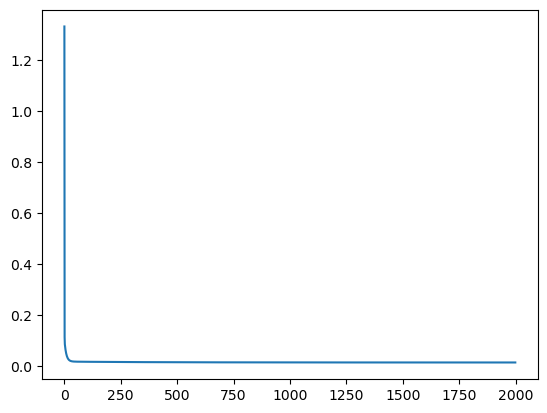

In [15]:
plt.plot(error_hist)

In [16]:
print(f"weights:\t{w}")
np.save(weights_file_path, w)

weights:	[[ 0.7466255 ]
 [-1.57075936]
 [ 0.93495642]]


In [17]:
weights_loaded=np.load(weights_file_path)
print(f"weights_loaded:\t{weights_loaded}")
degree_of_polynomial_loaded=len(weights_loaded.flatten())-1
print(f"degree_of_polynomial_loaded:\t{degree_of_polynomial_loaded}") 

weights_loaded:	[[ 0.7466255 ]
 [-1.57075936]
 [ 0.93495642]]
degree_of_polynomial_loaded:	2


In [18]:
# load test data
print("\ntest: ", end="\t")
x_test,x_aug_test, y_test = load_csv_as_augmented(csv_test_path,degree_of_polynomial)


test: 	Loaded Data:
    HorsePower       MPG
0     0.673913  0.159574
1     0.135870  0.609043
2     1.000000  0.186170
3     0.130435  0.678191
4     0.211957  0.319149
5     0.130435  0.664894
6     0.103261  0.744681
7     0.293478  0.239362
8     0.010870  0.914894
9     0.510870  0.226064
10    0.260870  0.345745
11    0.972826  0.132979
12    0.103261  0.845745
13    0.347826  0.255319
14    0.701087  0.106383
15    0.141304  0.465426
16    0.277174  0.239362
17    0.277174  0.372340
18    0.277174  0.345745
19    0.782609  0.159574
20    0.972826  0.079787
21    0.565217  0.132979
22    0.293478  0.212766
23    0.918478  0.132979
24    0.565217  0.159574
25    0.157609  0.622340
26    0.483696  0.244681
27    0.347826  0.289894
28    0.157609  0.718085
29    0.673913  0.106383
30    0.347826  0.159574
31    0.347826  0.332447
32    0.228261  0.239362
33    0.065217  0.718085
34    0.266304  0.398936
35    0.228261  0.505319
36    0.293478  0.265957
37    0.195652  0.585106
38  

In [19]:
y_hat_test = linear_regression(x_aug_test, weights_loaded)
y_hat_test.shape

(40, 1)

In [20]:
mae(y_test, y_hat_test)

0.08093732703008506

In [21]:
r2(y_test, y_hat_test)

0.8023578280188305

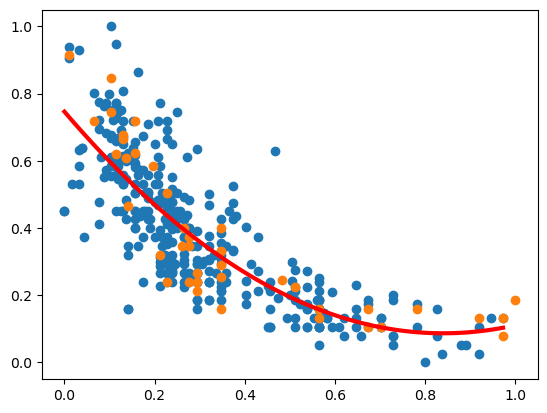

In [22]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial(x,degree_of_polynomial_loaded)
y_hat = linear_regression(xp, w)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)